dataset : https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022?resource=download

# client1~5 생성 (null값 만들어내기)

In [14]:

import pandas as pd
import numpy as np
import missingno

df = pd.read_csv('Base.csv')

In [3]:
object_cols = df.dtypes[df.dtypes==object].index
df[object_cols].apply(lambda x: len(x.unique()))

payment_type         5
employment_status    7
housing_status       7
source               2
device_os            5
dtype: int64

In [4]:
df[object_cols].apply(set)

payment_type                            {AC, AD, AB, AA, AE}
employment_status               {CE, CF, CD, CA, CB, CG, CC}
housing_status                  {BF, BG, BE, BB, BD, BA, BC}
source                                   {INTERNET, TELEAPP}
device_os            {macintosh, windows, linux, x11, other}
dtype: object

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, stratify=df['fraud_bool'], test_size=0.3, random_state=42)
test.to_csv('client_test.csv', index=False)
X_train = train.drop(['fraud_bool'], axis=1)
y_train = train['fraud_bool']
X_test = test.drop(['fraud_bool'], axis=1)
y_test = test['fraud_bool']

In [18]:
y_test.value_counts()

fraud_bool
0    296691
1      3309
Name: count, dtype: int64

In [9]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler(random_state=2021).fit_resample(X_train, y_train)
X_test_under, y_test_under = RandomUnderSampler(random_state=2021).fit_resample(X_test, y_test)

In [13]:
train = pd.concat([X_under, y_under], axis=1)
test_under = pd.concat([X_test_under, y_test_under], axis=1)
train.to_csv('client_train_under.csv', index=False)
test_under.to_csv('client_test_under.csv', index=False)

In [38]:
Tr = pd.concat([X_under,y_under], axis=1)
Tr = Tr.sample(frac=1, random_state=42)
numbers = Tr.shape[0]//5
client1 = Tr.iloc[:numbers,:].copy()
client2 = Tr.iloc[numbers:numbers*2,:].copy()
client3 = Tr.iloc[numbers*2:numbers*3,:].copy()
client4 = Tr.iloc[numbers*3:numbers*4,:].copy()
client5 = Tr.iloc[numbers*4:,:].copy()

In [40]:
client5['fraud_bool'].value_counts()

fraud_bool
1    1560
0    1528
Name: count, dtype: int64

In [41]:
client1.loc[:,['income','email_is_free']] = np.nan
client2.loc[:,['device_fraud_count','has_other_cards','name_email_similarity']] = np.nan
client3.loc[:,['zip_count_4w','velocity_6h','velocity_24h','velocity_4w','email_is_free']] = np.nan
client4.loc[:,['keep_alive_session','income','phone_home_valid']] = np.nan


In [47]:
temp = client5.drop(['income','device_fraud_count','has_other_cards','name_email_similarity',
                    'zip_count_4w','velocity_6h','velocity_24h','velocity_4w','email_is_free',
                    'keep_alive_session','income','phone_home_valid'],axis=1)
common_columns = temp.columns
common_columns

Index(['prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'housing_status', 'phone_mobile_valid',
       'bank_months_count', 'proposed_credit_limit', 'foreign_request',
       'source', 'session_length_in_minutes', 'device_os',
       'device_distinct_emails_8w', 'month', 'fraud_bool'],
      dtype='object')

In [42]:
client1.to_csv('client1.csv',index=False)
client2.to_csv('client2.csv',index=False)
client3.to_csv('client3.csv',index=False)
client4.to_csv('client4.csv',index=False)
client5.to_csv('client5.csv',index=False)

/home/choiyj/.conda/envs/choi/lib/python3.8/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/tmp/ipykernel_87799/3483215594.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),fontsize=10)


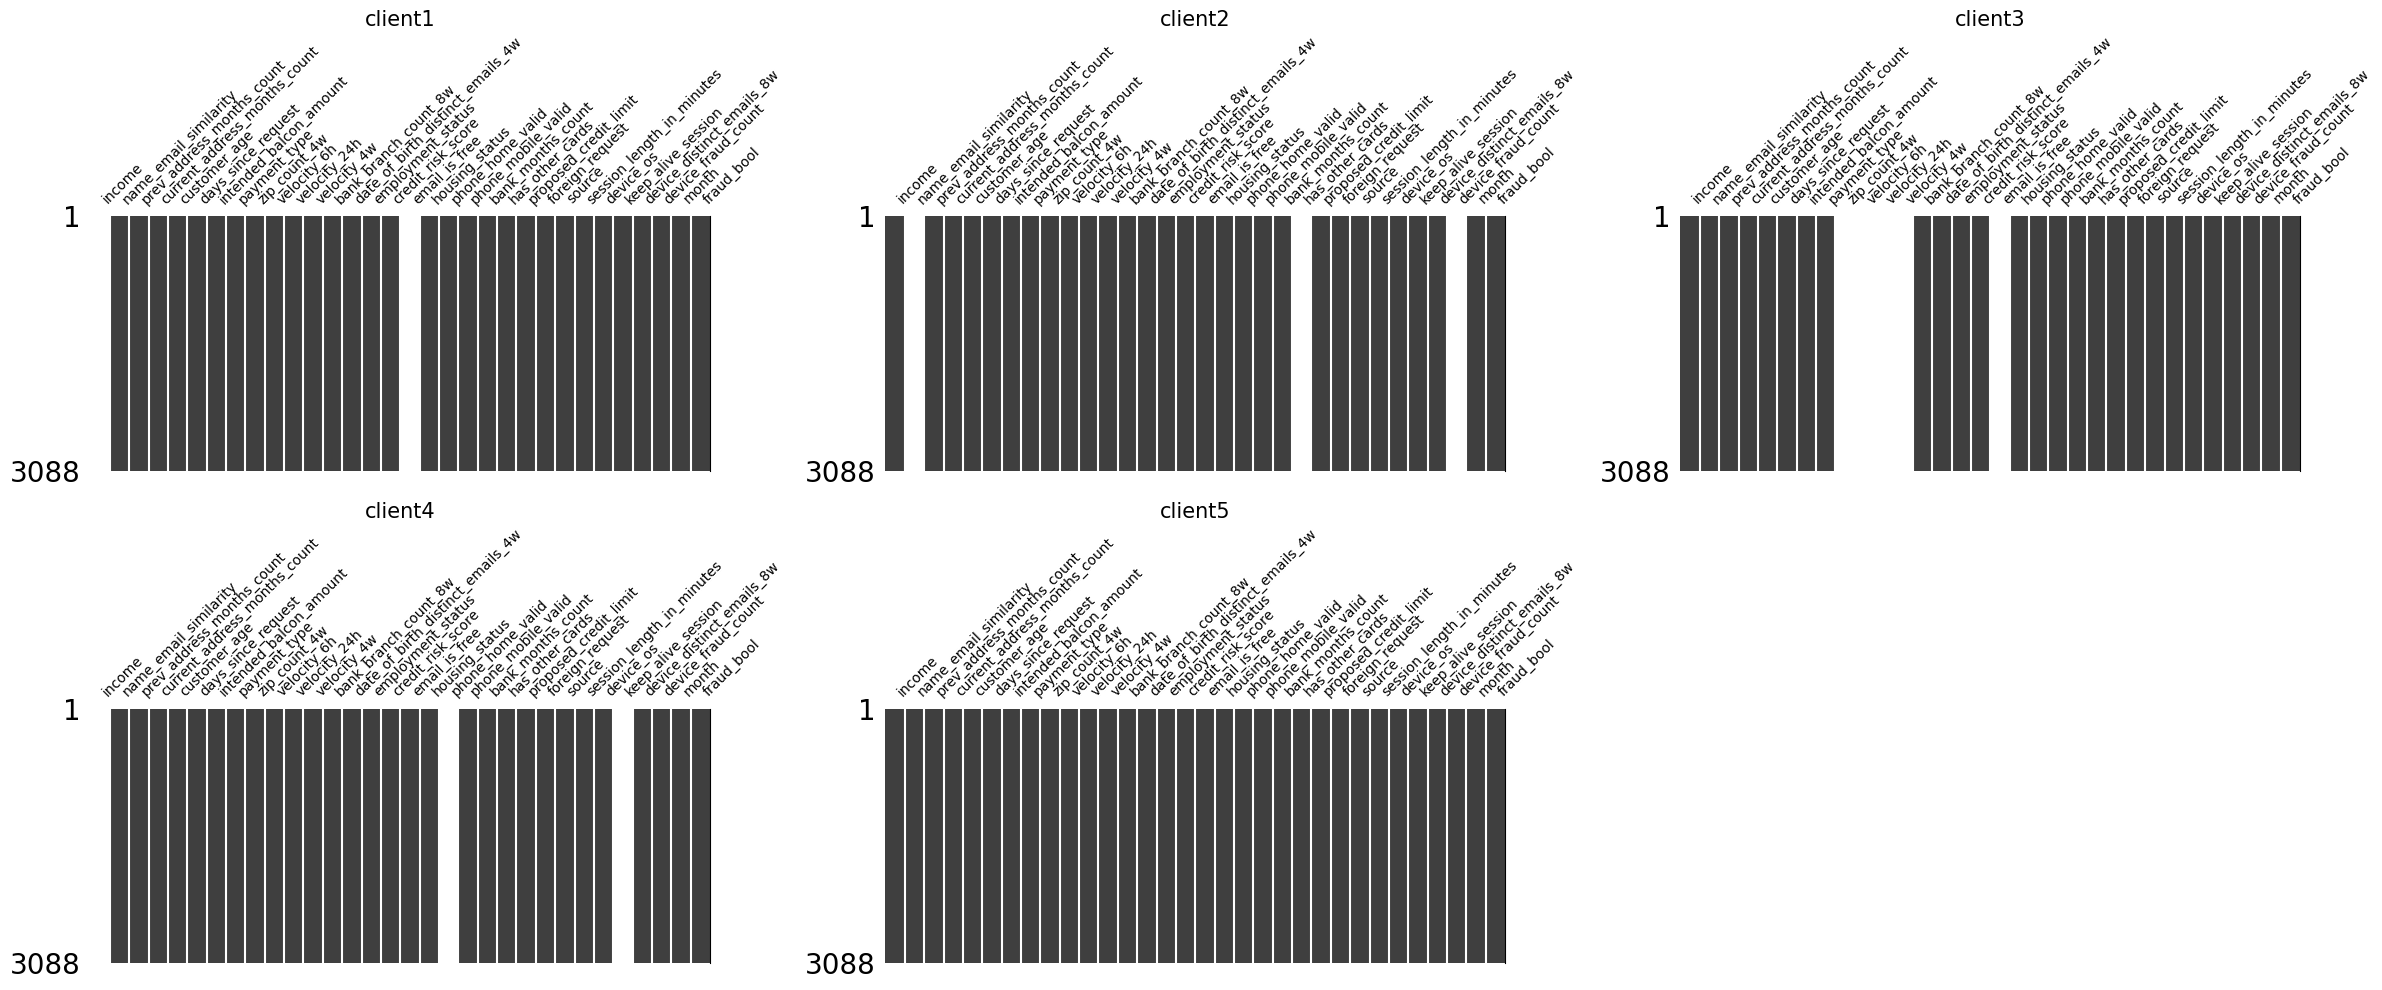

In [43]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,3,figsize=(24,10))
missingno.matrix(client1,ax=axes[0,0])
missingno.matrix(client2,ax=axes[0,1])
missingno.matrix(client4,ax=axes[1,0])
missingno.matrix(client3,ax=axes[0,2])
missingno.matrix(client5,ax=axes[1,1])

for i,ax in enumerate(axes.ravel()):
    ax.set_xticklabels(labels=ax.get_xticklabels(),fontsize=10)
    ax.set_title(f'client{i+1}',fontsize=15)
    ax.spines['right'].set_visible(True)

axes[1,2].set_visible(False)
plt.tight_layout()
plt.savefig('clients.jpg',dpi=600)

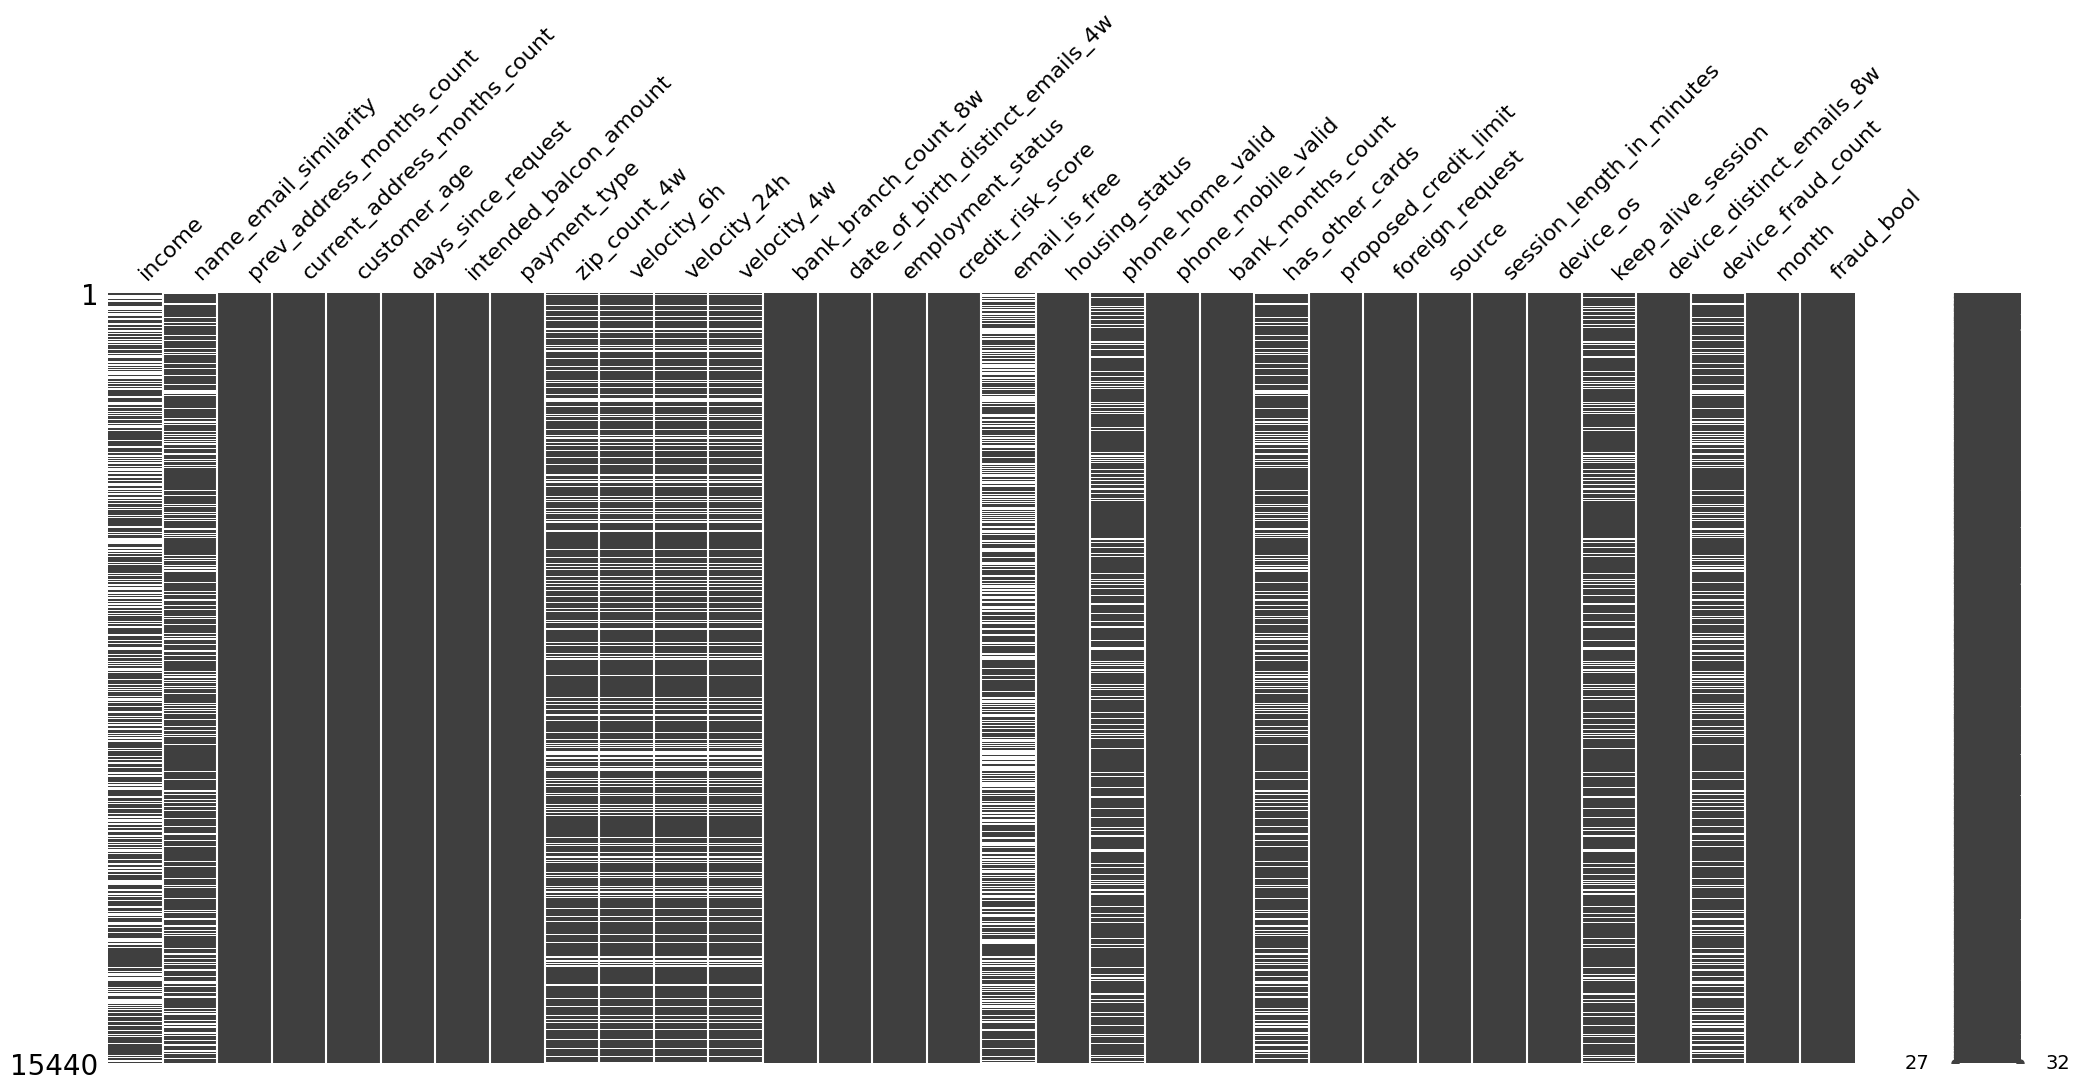

In [45]:
all_clinet = pd.concat([client1,client2,client3,client4,client5],axis=0)
missingno.matrix(all_clinet.sort_index())
plt.savefig('missingvales.jpg',dpi=600)